In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

### 1. Load the original image

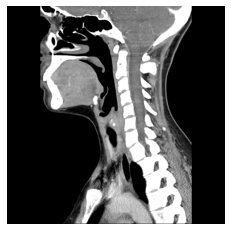

In [2]:
normal_img = cv2.imread('normal-ct-of-the-neck.jpg', 0)
## disable x & y axis
plt.axis('off')
plt.imshow(normal_img, cmap='gray', vmin=normal_img.min(), vmax=normal_img.max())

### 2. Smooth image using gaussian filter

In [3]:
smoothed_img = cv2.GaussianBlur(normal_img,(5,5),0)

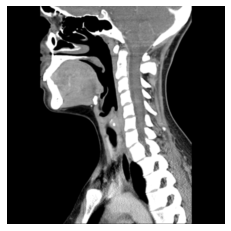

In [4]:
## disable x & y axis
plt.axis('off')
plt.imshow(smoothed_img, cmap='gray', vmin=smoothed_img.min(), vmax=smoothed_img.max())

### 3. Apply Sobel and Prewitt kernels

In [5]:
def apply_filter(img, filter_type):
    # Detect filter type
    if filter_type == 'sobel':
        kernel_x = np.array([[-1, 0, 1], 
                            [-2, 0, 2], 
                            [-1, 0, 1]])

        kernel_y = np.array([[-1, -2, -1], 
                            [0, 0, 0], 
                            [1, 2, 1]])

    elif filter_type == 'prewitt':
        kernel_x = np.array([[-1, -1, -1],
                            [0, 0, 0],
                            [1, 1, 1]])

        kernel_y = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])

    grad_x = cv2.filter2D(img, -1, kernel_x)
    grad_y = cv2.filter2D(img, -1, kernel_y)

    grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
    grad = grad / grad.max() * 255
    theta = np.arctan2(grad_y, grad_x)

    return grad, theta

#### Sobel

In [6]:
sobel_grad, sobel_theta = apply_filter(smoothed_img, 'sobel')

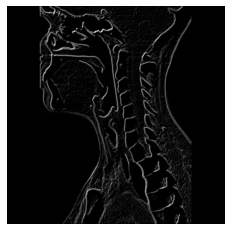

In [7]:
## disable x & y axis
plt.axis('off')
plt.imshow(sobel_grad, cmap='gray', vmin=sobel_grad.min(), vmax=sobel_grad.max())

#### Prewitt

In [8]:
prewitt_grad, prewitt_theta = apply_filter(smoothed_img, 'prewitt')

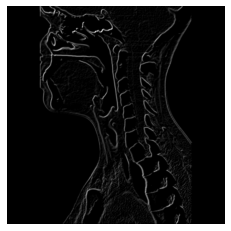

In [9]:
## disable x & y axis
plt.axis('off')
plt.imshow(prewitt_grad, cmap='gray', vmin=prewitt_grad.min(), vmax=prewitt_grad.max())

### 4. Apply non-maximum suppresion

In [10]:
def non_maxima_suppression(img, D):
    # Create a matrix initialized to 0
    Z = np.zeros(img.shape, dtype=np.int32)
    # Identify the edge direction
    angle = D * 180. / np.pi
    angle[angle < 0] += 180
    # Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            try:
                q = 255
                r = 255
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0
            except IndexError as e:
                pass
    return Z

In [11]:
nmp_img = non_maxima_suppression(sobel_grad, sobel_theta)

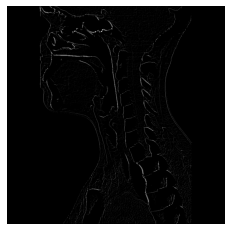

In [12]:
## disable x & y axis
plt.axis('off')
plt.imshow(nmp_img, cmap='gray', vmin=nmp_img.min(), vmax=nmp_img.max())

### 5. Apply non-maxima suppression on sobel and prewitt results